In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# don't truncate
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Data_Files/epl-training.csv")
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
count,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.000000,380.000000,380.000000
mean,1.536437,1.186640,0.684211,0.524089,13.969838,11.212753,5.901822,4.722874,10.708502,11.136842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.678368,4.105500,5.045342
std,1.310048,1.170426,0.838843,0.738293,5.495908,4.729521,3.408996,2.851796,3.440885,3.616051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.522706,1.085824,3.950274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120000,3.070000,1.370000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.660000,3.440000,2.462500
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,11.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185000,3.665000,3.665000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.025000,4.372500,5.952500
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,28.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400000,10.740000,26.180000


In [3]:
notNullColumns = [column for column in df if ~df[column].isnull().all()]
print(notNullColumns)

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72']


In [4]:
data = df[notNullColumns]
data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,16/08/08,Arsenal,West Brom,1,0,H,1,0,H,H Webb,...,8,7,5,0,0,0,0,NaN,NaN,NaN
1,16/08/08,Bolton,Stoke,3,1,H,3,0,H,C Foy,...,12,4,3,1,2,0,0,NaN,NaN,NaN
2,16/08/08,Everton,Blackburn,2,3,A,1,1,D,A Marriner,...,9,3,5,2,2,0,0,NaN,NaN,NaN
3,16/08/08,Hull,Fulham,2,1,H,1,1,D,P Walton,...,9,5,6,3,0,0,0,NaN,NaN,NaN
4,16/08/08,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,...,12,7,9,1,2,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,23/05/21,Liverpool,Crystal Palace,2,0,H,1,0,H,C Pawson,...,8,14,1,2,2,0,0,NaN,NaN,NaN
4936,23/05/21,Man City,Everton,5,0,H,2,0,H,M Oliver,...,10,7,5,2,2,0,0,NaN,NaN,NaN
4937,23/05/21,Sheffield United,Burnley,1,0,H,1,0,H,K Friend,...,1,8,9,3,1,0,0,NaN,NaN,NaN
4938,23/05/21,West Ham,Southampton,3,0,H,2,0,H,M Atkinson,...,9,2,3,0,3,0,0,NaN,NaN,NaN


In [54]:
data = data.iloc[:,:22]
# from row 1520 to row 1900 (18/08/12 - 17/08/13), 3 features appear to be added - consult data source?
# will remove it for now
data = pd.concat((pd.get_dummies(data["FTR"]), data), axis=1)
data = data.drop(["FTR"], axis=1)
data.rename(columns={"A": "AwayWin", "D": "Draw", "H":"HomeWin"},inplace=True)
data.columns

Index(['AwayWin', 'Draw', 'HomeWin', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [55]:
data.isnull().sum().sum()

0

In [56]:
numericData = data.select_dtypes(include=np.number)
print(numericData.shape)
# numericData = numericData.iloc[:,:16]
numericData.head()

(4940, 19)


,AwayWin,Draw,HomeWin,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,1,1,0,1,0,24,5,14,4,11,8,7,5,0,0,0,0
1,0,0,1,3,1,3,0,14,8,8,2,13,12,4,3,1,2,0,0
2,1,0,0,2,3,1,1,10,15,5,11,11,9,3,5,2,2,0,0
3,0,0,1,2,1,1,1,11,12,6,6,10,9,5,6,3,0,0,0
4,0,0,1,2,1,0,0,14,8,10,5,11,12,7,9,1,2,0,0


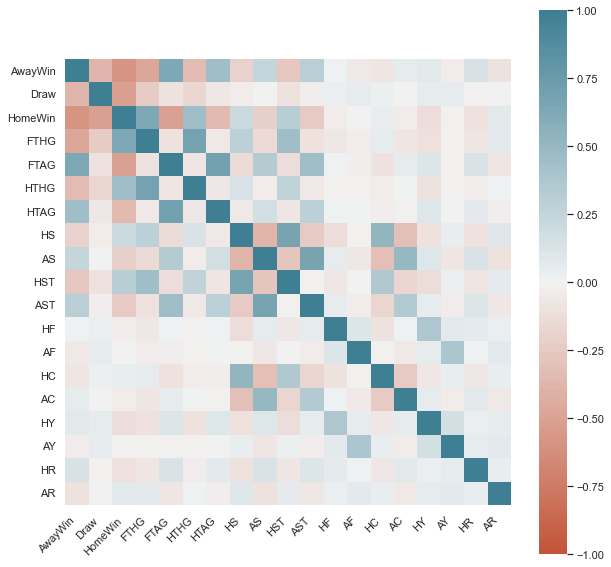

In [57]:
corr = data.corr()
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
import requests
from bs4 import BeautifulSoup
import re

In [4]:
urls = ['https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/2458/Stages/4345/TeamStatistics/England-Premier-League-2010-2011',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/2935/Stages/5476/TeamStatistics/England-Premier-League-2011-2012',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/3389/Stages/6531/TeamStatistics/England-Premier-League-2012-2013',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/3853/Stages/7794/TeamStatistics/England-Premier-League-2013-2014',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/4311/Stages/9155/TeamStatistics/England-Premier-League-2014-2015',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/5826/Stages/12496/TeamStatistics/England-Premier-League-2015-2016',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/6335/Stages/13796/TeamStatistics/England-Premier-League-2016-2017',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/6829/Stages/15151/TeamStatistics/England-Premier-League-2017-2018',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/7361/Stages/16368/TeamStatistics/England-Premier-League-2018-2019',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/7811/Stages/17590/TeamStatistics/England-Premier-League-2019-2020',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/8228/Stages/18685/TeamStatistics/England-Premier-League-2020-2021',
           'https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/8618/Stages/19793/TeamStatistics/England-Premier-League-2021-2022']

In [6]:
def remove_numbering(s):
    return re.sub(r'[0-9]+\.+', '', s).strip()

In [7]:
data = pd.read_csv("EPLRatings.csv")
data["Team"] = data["Team"].apply(remove_numbering)
data

,Year,Team,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,2021,Liverpool,35,19.5,140,61.8,85.9,15.0,7.12
1,2021,Chelsea,30,15.5,131,58.2,86.5,15.3,7.11
2,2021,Manchester City,22,17.7,181,64.1,88.9,11.6,6.97
3,2021,West Ham,23,15.0,141,48.8,81.9,16.3,6.86
4,2021,Crystal Palace,18,11.7,220,51.9,81.7,16.4,6.76
...,...,...,...,...,...,...,...,...,...
255,2009,Blackburn,41,12.9,572,45.9,63.8,21.2,6.80
256,2009,Portsmouth,37,14.0,685,48.4,73.6,13.7,6.72
257,2009,Wolverhampton Wanderers,31,11.5,634,47.6,67.3,15.0,6.71
258,2009,Burnley,42,12.1,572,49.2,68.7,15.2,6.67


In [8]:
data["YellowCards"] = data.Discipline.astype(str).str[:2].astype(int)
data["RedCards"] = data.Discipline.astype(str).str[2:3].astype(int)
data.drop(columns=["Discipline"], inplace=True)
data

,Year,Team,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating,YellowCards,RedCards
0,2021,Liverpool,35,19.5,61.8,85.9,15.0,7.12,14,0
1,2021,Chelsea,30,15.5,58.2,86.5,15.3,7.11,13,1
2,2021,Manchester City,22,17.7,64.1,88.9,11.6,6.97,18,1
3,2021,West Ham,23,15.0,48.8,81.9,16.3,6.86,14,1
4,2021,Crystal Palace,18,11.7,51.9,81.7,16.4,6.76,22,0
...,...,...,...,...,...,...,...,...,...,...
255,2009,Blackburn,41,12.9,45.9,63.8,21.2,6.80,57,2
256,2009,Portsmouth,37,14.0,48.4,73.6,13.7,6.72,68,5
257,2009,Wolverhampton Wanderers,31,11.5,47.6,67.3,15.0,6.71,63,4
258,2009,Burnley,42,12.1,49.2,68.7,15.2,6.67,57,2


In [9]:
teams = data["Team"].unique()
print(teams)
# plt.rcParams['figure.figsize'] = [20, 15]
ratings = []
goals = []
shotspg = []
possession = []
passes = []
aerialswon = []
yellows = []
reds = []
for team in teams:
    temp = data.loc[data['Team'] == team].sort_values(by=["Year"])
#     temp = temp.drop(["Discipline","AerialsWon"],axis=1)
#     print(temp)
    years = temp['Year']
    temp = temp.iloc[:,2:].transpose()
    temp.columns = years
#     print(temp.index)
#     for row in temp.index:
#         plt.plot(years,temp.loc[row],label=row)

#     plt.legend()
#     plt.grid()
#     plt.show()
    ratings.append(temp.loc["Rating"])
    goals.append(temp.loc["Goals"])
    shotspg.append(temp.loc["Shots pg"])
    possession.append(temp.loc["Possession%"])
    passes.append(temp.loc["Pass%"])
    aerialswon.append(temp.loc["AerialsWon"])
    yellows.append(temp.loc["YellowCards"])
    reds.append(temp.loc["RedCards"])
    
#     plt.plot(years,temp.loc["Rating"],label=team)
# plt.legend()
# plt.grid()
# plt.show()

['Liverpool' 'Chelsea' 'Manchester City' 'West Ham' 'Crystal Palace'
 'Everton' 'Wolverhampton Wanderers' 'Southampton' 'Brighton' 'Burnley'
 'Brentford' 'Tottenham' 'Manchester United' 'Aston Villa' 'Arsenal'
 'Leicester' 'Leeds' 'Watford' 'Newcastle United' 'Norwich' 'Fulham'
 'West Bromwich Albion' 'Sheffield United' 'Bournemouth' 'Cardiff'
 'Huddersfield' 'Stoke' 'Swansea' 'Middlesbrough' 'Sunderland' 'Hull'
 'Queens Park Rangers' 'Wigan' 'Reading' 'Bolton' 'Blackburn' 'Blackpool'
 'Birmingham' 'Portsmouth']


In [10]:
newteams = ['Liverpool', 'Chelsea', 'Man City', 'West Ham', 'Crystal Palace',
 'Everton', 'Wolves', 'Southampton', 'Brighton', 'Burnley',
 'Brentford', 'Tottenham', 'Man United', 'Aston Villa', 'Arsenal',
 'Leicester', 'Leeds', 'Watford', 'Newcastle', 'Norwich', 'Fulham',
 'West Brom', 'Sheffield United', 'Bournemouth', 'Cardiff',
 'Huddersfield', 'Stoke', 'Swansea', 'Middlesbrough', 'Sunderland', 'Hull',
 'QPR', 'Wigan', 'Reading', 'Bolton', 'Blackburn', 'Blackpool',
 'Birmingham', 'Portsmouth']

#        West Ham',
#        'QPR',

In [18]:
df = pd.DataFrame(reds,index = teams)
df.index = newteams
df.to_pickle("./Pickles/redsDF.pkl")

In [58]:
shotspg

[Year
 2009    16.9
 2010    15.3
 2011    17.6
 2012    19.4
 2013    17.1
 2014    15.5
 2015    16.6
 2016    16.8
 2017    16.8
 2018    15.1
 2019    15.6
 2020    16.0
 2021    19.5
 Name: Shots pg, dtype: float64,
 Year
 2009    21.9
 2010    19.6
 2011    17.7
 2012    16.5
 2013    18.2
 2014    14.8
 2015    13.8
 2016    15.3
 2017    15.9
 2018    16.0
 2019    16.4
 2020    14.6
 2021    15.5
 Name: Shots pg, dtype: float64,
 Year
 2009    13.8
 2010    14.4
 2011    19.4
 2012    17.3
 2013    17.7
 2014    17.6
 2015    16.2
 2016    16.7
 2017    17.5
 2018    18.0
 2019    19.6
 2020    15.8
 2021    17.7
 Name: Shots pg, dtype: float64,
 Year
 2009    14.4
 2010    15.1
 2012    13.0
 2013    11.1
 2014    12.9
 2015    14.7
 2016    13.1
 2017     9.8
 2018    11.6
 2019    11.0
 2020    12.3
 2021    15.0
 Name: Shots pg, dtype: float64,
 Year
 2013    10.9
 2014    11.6
 2015    12.3
 2016    11.6
 2017    12.5
 2018    13.0
 2019     9.9
 2020     9.2
 2021    11.